<a href="https://colab.research.google.com/github/isa-ulisboa/greends-pml/blob/main/perceptron_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adapt the Script that implements a convolutional neural network with PyTorch over the mnist 8 by 8 practice data set available on Overview notebook to classify images from the CIFAR-10 data set which contains 60000 32 by 32 color images.
You need to access/download the data and you need to adjust the model parameters for the input and hidden layers.
The CIFAR-10 color images have 3 channels, H=32, and W=32.
You are not supposed to use other pre-defined and pre-trained models as in many examples that you can find on-line.
You're expected to adapt the model in the script.
Getting a high accuracy is not a goal.
The goal is to be able to adapt the code and explain in the video how you did it.
Use a small number of epochs (start with only 5 perhaps) since training will take much longer than in the examples we have seen in class so far.

Each student should create a video (3' maximum) explaing which were the major changes that were made on the script and submit the video and the link to file in their GitHub repository where the modified script is available.

Submission deadline: Wednesday, April 24

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/5], Step [100/782], Loss: 1.5459
Epoch [1/5], Step [200/782], Loss: 1.3293
Epoch [1/5], Step [300/782], Loss: 1.4285
Epoch [1/5], Step [400/782], Loss: 1.1671
Epoch [1/5], Step [500/782], Loss: 1.2736
Epoch [1/5], Step [600/782], Loss: 1.3543
Epoch [1/5], Step [700/782], Loss: 1.2266
Epoch [2/5], Step [100/782], Loss: 0.9827
Epoch [2/5], Step [200/782], Loss: 1.3242
Epoch [2/5], Step [300/782], Loss: 1.1100
Epoch [2/5], Step [400/782], Loss: 1.0945
Epoch [2/5], Step [500/782], Loss: 0.7285
Epoch [2/5], Step [600/782], Loss: 1.2010
Epoch [2/5], Step [700/782], Loss: 1.2547
Epoch [3/5], Step [100/782], Loss: 1.1315
Epoch [3/5], Step [200/782], Loss: 0.9836
Epoch [3/5], Step [300/782], Loss: 0.7065
Epoch [3/5], Step [400/782], Loss: 0.8099
Epoch [3/5], Step [500/782], Loss: 0.8453
Epoch [3/5], Step [600/782], Loss: 0.9271
Epoch [3/5], Step [700/782], Loss: 0.8087
Epoch [4/5], Step [100/782], Loss: 0.8756


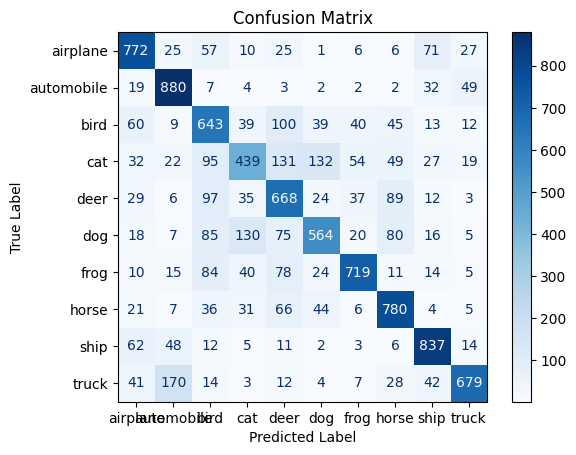

Overall accuracy: 0.6981


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor (Converts images to PyTorch tensors)
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values to [-1, 1]
])

#specify the root directory for dataset storage
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define data loaders (allows iteration over batches of data)
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 32 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) #learning rate

# Training
num_epochs = 5  # Small number of epochs for faster training
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Testing
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Plot confusion matrix
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate overall accuracy
accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
print('Overall accuracy:', accuracy)
